In [1]:
from qutip import *
from qutip.qip.operations import rx, ry, rz
from qutip.metrics import fidelity
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import os

In [2]:
# define Pauli matrices and constants
σ_x = sigmax()
σ_y = sigmay()
σ_z = sigmaz()
π = np.pi

# define DXYZ, a conditional displacement by α and scaled by XX + YY + ZZ - E_n 
def DXYZ(α, λ, E_n):
    
    XXZ_offset_sum = tensor(σ_x, σ_x) + tensor(σ_y, σ_y) + λ*tensor(σ_z, σ_z) - E_n*tensor(I2, I2)
    return (tensor(α*a.dag() - np.conj(α)*a, XXZ_offset_sum)).expm()

In [3]:
# define parameters for ground state projection
cutoff = 30
num_states = 4
λ = 1
E_n = -3
α_start = 0
α_end = 2
steps = 50

def ground_state_projection(cutoff, num_states, λ, E_n, α_start, α_end, steps, singlet):

    # define operators for bosonic modes 
    a = destroy(cutoff)
    Ib = identity(cutoff)

    # define vacuum state for a cavity, and spin up and spin down states for qubits
    vacuum = basis(cutoff, 0)
    up = basis(2,0)
    down = basis(2,1)

    # define array over which we will sweep α
    α_array = np.linspace(α_start, α_end, steps)

    # with both cavities in vacuum, define initial state that is a random two-qubit state;
    # for sanity check, also define singlet state with both cavities in vacuum
    # initial_state = (tensor(vacuum, rand_ket(2), rand_ket(2))).unit()
    initial_state_list = [(tensor(vacuum, rand_ket(2), rand_ket(2))).unit() for state in range(num_states)]

    # define a singlet state and a density matrix for a singlet state
    singlet_state = (tensor(up, down) - tensor(down, up)).unit()
    ρ_singlet_state = singlet_state*singlet_state.dag()

    # define projection operator that projects the first cavity onto the vacuum
    P = tensor(vacuum*vacuum.dag(), I2, I2)

    projection_fidelity_list = [[fidelity(ρ_singlet_state, ((P*DXYZ(α, λ, E_n)*initial_state).unit()).ptrace([1,2])) \
                                 for α in α_array] for initial_state in initial_state_list]

    # create plot 
    fig, ax = plt.subplots(figsize=(8, 6))

    # # graph the projection of all initial states onto the singlet 
    for i, projection in enumerate(projection_fidelity_list): 
        ax.plot(α_array, projection, label=f'Inital Fidelity {projection[0] : .3f}')
        
    # plot ground state projection overlap with singlet as initial state
    if singlet == True:
        initial_state_singlet = (tensor(vacuum, up, down) - tensor(vacuum, down, up)).unit()
        
        singlet_projection = [fidelity(ρ_singlet_state, ((P*DXYZ(α, λ, E_n)*initial_state_singlet).unit()).ptrace([1,2])) \
                                 for α in α_array]
        
        # plot projection onto singlet with singlet as initial state
        ax.plot(α_array, singlet_projection, label = 'Singlet')

    ax.set_xlabel(r'$\alpha$')
    ax.set_ylabel('Fidelity')
    ax.set_title('Singlet Projection Fidelity')
    ax.legend()
    ax.grid(True)

In [4]:
ground_state_projection(cutoff, num_states, λ, E_n, α_start, α_end, steps, singlet = False)

NameError: name 'I2' is not defined

In [5]:
α = 1
fidelity(ρ_singlet_state, ((P*DXYZ(α, λ, E_n)*initial_state).unit()).ptrace([1,2]))

NameError: name 'ρ_singlet_state' is not defined

In [6]:
N = 20
α = 1

rho_coherent = coherent_dm(N, α)

rho_thermal = thermal_dm(N, 2)

rho_fock = fock_dm(N, 10)

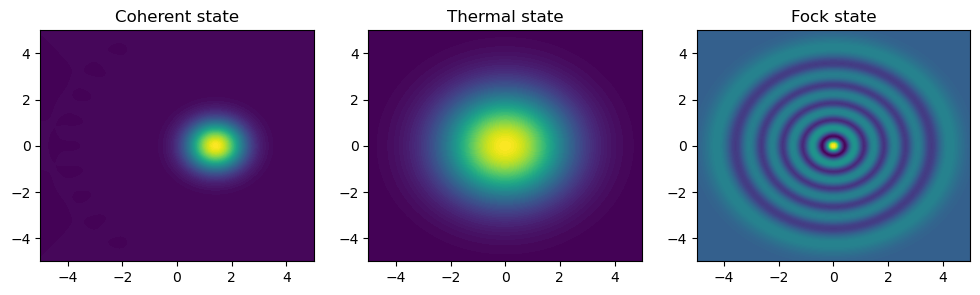

In [7]:
xvec = np.linspace(-5,5,200)

W_coherent = wigner(rho_coherent, xvec, xvec)

W_thermal = wigner(rho_thermal, xvec, xvec)

W_fock = wigner(rho_fock, xvec, xvec)

# plot the results

fig, axes = plt.subplots(1, 3, figsize=(12,3))

cont0 = axes[0].contourf(xvec, xvec, W_coherent, 100)

lbl0 = axes[0].set_title("Coherent state")

cont1 = axes[1].contourf(xvec, xvec, W_thermal, 100)

lbl1 = axes[1].set_title("Thermal state")

cont0 = axes[2].contourf(xvec, xvec, W_fock, 100)

lbl2 = axes[2].set_title("Fock state")

plt.show()

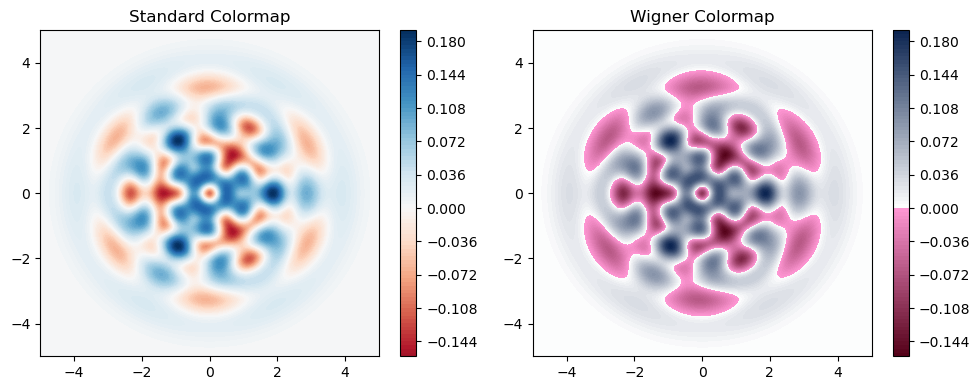

In [8]:
import matplotlib as mpl

from matplotlib import cm

psi = (basis(10, 0) + basis(10, 3) + basis(10, 9)).unit()

xvec = np.linspace(-5, 5, 500)

W = wigner(psi, xvec, xvec)

wmap = wigner_cmap(W)  # Generate Wigner colormap

nrm = mpl.colors.Normalize(-W.max(), W.max())

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

plt1 = axes[0].contourf(xvec, xvec, W, 100, cmap=cm.RdBu, norm=nrm)

axes[0].set_title("Standard Colormap");

cb1 = fig.colorbar(plt1, ax=axes[0])

plt2 = axes[1].contourf(xvec, xvec, W, 100, cmap=wmap)  # Apply Wigner colormap

axes[1].set_title("Wigner Colormap");

cb2 = fig.colorbar(plt2, ax=axes[1])

fig.tight_layout()

plt.show()

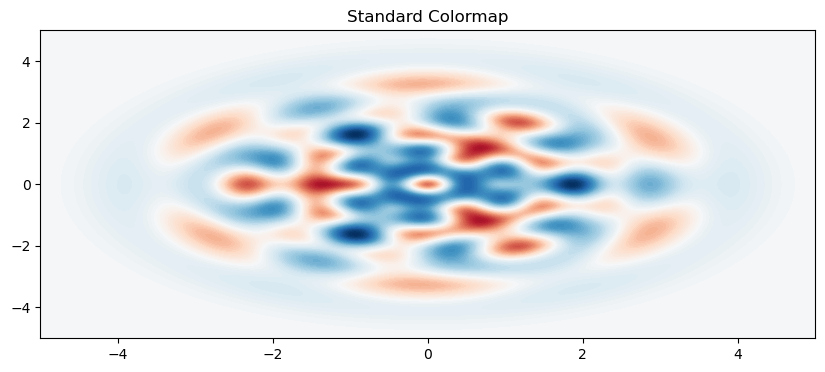

In [12]:
import matplotlib as mpl

from matplotlib import cm

psi = (basis(10, 0) + basis(10, 3) + basis(10, 9)).unit()

xvec = np.linspace(-5, 5, 500)

W = wigner(psi, xvec, xvec)

wmap = wigner_cmap(W)  # Generate Wigner colormap

nrm = mpl.colors.Normalize(-W.max(), W.max())

fig, ax = plt.subplots(figsize=(10, 4))

ax.contourf(xvec, xvec, W, 100, cmap=cm.RdBu, norm=nrm)

ax.set_title("Standard Colormap");

# cb1 = fig.colorbar(plt1, ax=axes[0])

plt.show()

In [150]:
N = 10
α = 1
vacuum = basis(10)
coherent_dm(N, α)

Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[3.67879441e-01 3.67879441e-01 2.60130047e-01 1.50186155e-01
  7.50930613e-02 3.35827506e-02 1.37094277e-02 5.18515195e-03
  1.81760459e-03 6.67227779e-04]
 [3.67879441e-01 3.67879441e-01 2.60130047e-01 1.50186155e-01
  7.50930613e-02 3.35827506e-02 1.37094277e-02 5.18515195e-03
  1.81760459e-03 6.67227779e-04]
 [2.60130047e-01 2.60130047e-01 1.83939720e-01 1.06197648e-01
  5.30988128e-02 2.37465906e-02 9.69402930e-03 3.66645610e-03
  1.28524053e-03 4.71801286e-04]
 [1.50186155e-01 1.50186155e-01 1.06197648e-01 6.13132417e-02
  3.06566143e-02 1.37101007e-02 5.59685050e-03 2.11682944e-03
  7.42033975e-04 2.72394603e-04]
 [7.50930613e-02 7.50930613e-02 5.30988128e-02 3.06566143e-02
  1.53283038e-02 6.85504886e-03 2.79842465e-03 1.05841449e-03
  3.71016908e-04 1.36197272e-04]
 [3.35827506e-02 3.35827506e-02 2.37465906e-02 1.37101007e-02
  6.85504886e-03 3.06568133e-03 1.25149775e-03 4.73338939e-

In [151]:
coherent(N=10, alpha = α) 

Quantum object: dims = [[10], [1]], shape = (10, 1), type = ket
Qobj data =
[[0.60653066]
 [0.60653066]
 [0.42888194]
 [0.24761511]
 [0.12380753]
 [0.0553686 ]
 [0.02260303]
 [0.00854887]
 [0.00299672]
 [0.00110007]]

In [154]:
def D(α):
    a = destroy(N)
    return (α*a.dag() - np.conj(α)*a).expm()
(D(α)*vacuum)*(D(α)*vacuum).dag()

Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[3.67879441e-01 3.67879441e-01 2.60130047e-01 1.50186155e-01
  7.50930613e-02 3.35827506e-02 1.37094277e-02 5.18515195e-03
  1.81760459e-03 6.67227779e-04]
 [3.67879441e-01 3.67879441e-01 2.60130047e-01 1.50186155e-01
  7.50930613e-02 3.35827506e-02 1.37094277e-02 5.18515195e-03
  1.81760459e-03 6.67227779e-04]
 [2.60130047e-01 2.60130047e-01 1.83939720e-01 1.06197648e-01
  5.30988128e-02 2.37465906e-02 9.69402930e-03 3.66645610e-03
  1.28524053e-03 4.71801286e-04]
 [1.50186155e-01 1.50186155e-01 1.06197648e-01 6.13132417e-02
  3.06566143e-02 1.37101007e-02 5.59685050e-03 2.11682944e-03
  7.42033975e-04 2.72394603e-04]
 [7.50930613e-02 7.50930613e-02 5.30988128e-02 3.06566143e-02
  1.53283038e-02 6.85504886e-03 2.79842465e-03 1.05841449e-03
  3.71016908e-04 1.36197272e-04]
 [3.35827506e-02 3.35827506e-02 2.37465906e-02 1.37101007e-02
  6.85504886e-03 3.06568133e-03 1.25149775e-03 4.73338939e-

In [155]:
(D(α)*vacuum)*(D(α)*vacuum).dag() == coherent_dm(N, α)

True

In [160]:
(D(α)*vacuum)*(D(α)*vacuum).dag()

Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[3.67879441e-01 3.67879441e-01 2.60130047e-01 1.50186155e-01
  7.50930613e-02 3.35827506e-02 1.37094277e-02 5.18515195e-03
  1.81760459e-03 6.67227779e-04]
 [3.67879441e-01 3.67879441e-01 2.60130047e-01 1.50186155e-01
  7.50930613e-02 3.35827506e-02 1.37094277e-02 5.18515195e-03
  1.81760459e-03 6.67227779e-04]
 [2.60130047e-01 2.60130047e-01 1.83939720e-01 1.06197648e-01
  5.30988128e-02 2.37465906e-02 9.69402930e-03 3.66645610e-03
  1.28524053e-03 4.71801286e-04]
 [1.50186155e-01 1.50186155e-01 1.06197648e-01 6.13132417e-02
  3.06566143e-02 1.37101007e-02 5.59685050e-03 2.11682944e-03
  7.42033975e-04 2.72394603e-04]
 [7.50930613e-02 7.50930613e-02 5.30988128e-02 3.06566143e-02
  1.53283038e-02 6.85504886e-03 2.79842465e-03 1.05841449e-03
  3.71016908e-04 1.36197272e-04]
 [3.35827506e-02 3.35827506e-02 2.37465906e-02 1.37101007e-02
  6.85504886e-03 3.06568133e-03 1.25149775e-03 4.73338939e-

In [163]:
# dimension of our Fock Space
cutoff = 10

# annihilation and identity operator in Fock Space
a = destroy(cutoff)
Ib = identity(cutoff)

In [164]:
D(α)

Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = False
Qobj data =
[[ 6.06530660e-01 -6.06530660e-01  4.28881942e-01 -2.47615108e-01
   1.23807527e-01 -5.53685952e-02  2.26030251e-02 -8.54887031e-03
   2.99672335e-03 -1.10007263e-03]
 [ 6.06530660e-01  4.22913674e-10 -4.28881937e-01  4.95230260e-01
  -3.71422273e-01  2.21476169e-01 -1.13006621e-01  5.13259696e-02
  -2.08796388e-02  8.99017004e-03]
 [ 4.28881942e-01  4.28881937e-01 -3.03265390e-01 -1.75090859e-01
   4.37721921e-01 -4.30688478e-01  3.03568633e-01 -1.75701716e-01
   8.56999121e-02 -4.50702713e-02]
 [ 2.47615108e-01  4.95230260e-01  1.75090859e-01 -4.04349314e-01
   5.05739097e-02  3.16620226e-01 -4.32966203e-01  3.65668855e-01
  -2.25903855e-01  1.55777045e-01]
 [ 1.23807527e-01  3.71422273e-01  4.37721921e-01 -5.05739097e-02
  -3.79263185e-01  2.13829323e-01  1.66942719e-01 -4.05446304e-01
   3.57686588e-01 -3.77887782e-01]
 [ 5.53685952e-02  2.21476169e-01  4.30688478e-01  3.16620226e-01
  -2